# MONEY MANAGEMENT: INTERPRETATION OF Hodrick–Prescott filter

The Hodrick–Prescott filter (also known as Hodrick–Prescott decomposition) is a mathematical tool used in macroeconomics, especially in real business cycle theory, to remove the cyclical component of a time series from raw data. It is used to obtain a smoothed-curve representation of a time series, one that is more sensitive to long-term than to short-term fluctuations. The adjustment of the sensitivity of the trend to short-term fluctuations is achieved by modifying a multiplier $\lambda$ . The filter was popularized in the field of economics in the 1990s by economists Robert J. Hodrick.

I believe HP Filter provides good interpretation on the target time-series variable. However, I do not recommend forming investment decisions based on HP Filter. One of the basic property of forming investment decision is capability of forward-looking. HP Filter does not provide good predictive power when it comes to forward-looking expectation.

### Initiate Library

Let us start by initiating all the required libraries.

### Get Data

Next, let us get the data from **yfinance**. In this case, user can define any stock he or she likes. 

### HP Filter

Then we need to call the HP Filter function from stats model library.

### Visualization

I always land on visualization after some technical analysis. We observe HP Filter break a time-series data into trend and cycle. Trend is very much like stock price but in a smoother way. Cycle acts like white noise. 

### Software Management

Last but not least, I land on software management. In this section, I provide a softly coded program for user to call for future reference.

### Bonus: Tuning

There is an important variable $\lambda$ in HP Filter function. In this exercise, I attempt to try different value of $\lambda$ and I compute the Root Mean Square Error (RMSE) between price and trend as well as cycle, respectively. Results seem to suggests

- the larger the value is for $\lambda$, the higher the RMSE is for trend at measuring stock price; though the RMSE eventually flattens out;

- the larger the value is for $\lambda$, the more volatile the RMSE is for cycle at measuring stock price; this suggests that larger $\lambda$ will eventually blow up the variance of the RMSE.

## Initiate Library

In [1]:
import pandas as pd
import numpy as np
import datetime
from pathlib import Path
import yfinance as yf
%matplotlib inline

## Get Data

In [3]:
# Define function
def getDatafromYF(ticker, start_date, end_date):
    stockData = yf.download(ticker, start_date, end_date)
    return stockData
# End function

In [4]:
tickers = 'AAPL'
stockData = getDatafromYF(tickers, '2017-01-01', '2020-01-01')
stockData.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,115.800003,116.330002,114.760002,116.150002,110.691154,28781900
2017-01-04,115.849998,116.510002,115.750000,116.019997,110.567276,21118100
2017-01-05,115.919998,116.860001,115.809998,116.610001,111.129562,22193600
2017-01-06,116.779999,118.160004,116.470001,117.910004,112.368469,31751900
2017-01-09,117.949997,119.430000,117.940002,118.989998,113.397697,33561900


## Stats Model APIs: HP Filter

In [5]:
import statsmodels.api as sm
temp = sm.tsa.filters.hpfilter(stockData['Close'], lamb=1)

In [6]:
finalData = pd.DataFrame({'Close': stockData['Close'], 'Cycle': temp[0], 'Trend': temp[1]})
finalData

,Close,Cycle,Trend
Date,,,
2017-01-03,116.150002,0.258666,115.891336
2017-01-04,116.019997,-0.262425,116.282421
2017-01-05,116.610001,-0.322172,116.932173
2017-01-06,117.910004,0.073172,117.836831
2017-01-09,118.989998,0.319531,118.670467
...,...,...,...
2019-12-24,284.269989,-1.170789,285.440778
2019-12-26,289.910004,1.730721,288.179282
2019-12-27,289.799988,-0.316334,290.116322


## Visualization by Matplotlib

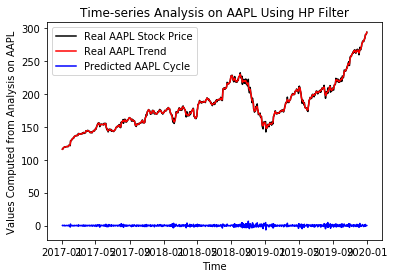

In [8]:
import matplotlib.pyplot as plt
plt.plot(stockData['Close'], color = 'black', label = f'Real {tickers} Stock Price')
plt.plot(temp[1], color = 'red', label = f'Real {tickers} Trend')
plt.plot(temp[0], color = 'blue', label = f'Predicted {tickers} Cycle')
plt.title(f'Time-series Analysis on {tickers} Using HP Filter')
plt.xlabel('Time')
plt.ylabel(f'Values Computed from Analysis on {tickers}')
plt.legend()
plt.show()

In [9]:
sum_of_errors = (stockData['Close'] - temp[1]) ** 2

RMSE = np.sqrt(sum_of_errors).sum()/len(sum_of_errors)

RMSE

0.9310145075179161

## Software Management

In [10]:
# Define function
def MM_HPFilter(ticker, start_date, end_date, verbose=True, lamb=1600):
    ## Libraries
    import pandas as pd
    import numpy as np
    import datetime
    from pathlib import Path
    import yfinance as yf
    %matplotlib inline

    ## Get Data
    # Define function
    def getDatafromYF(ticker, start_date, end_date):
        stockData = yf.download(ticker, start_date, end_date)
        return stockData
    # End function

    # Data
    stockData = getDatafromYF(tickers, start_date, end_date)

    ## Stats Model APIs: HP Filter
    import statsmodels.api as sm
    temp = sm.tsa.filters.hpfilter(stockData['Close'], lamb=lamb)
    finalData = pd.DataFrame({'Close': stockData['Close'], 'Cycle': temp[0], 'Trend': temp[1]})
    #finalData

    ## Visualization by Matplotlib
    import matplotlib.pyplot as plt
    if verbose:
        plt.plot(stockData['Close'], color = 'black', label = f'Real {tickers} Stock Price')
        plt.plot(temp[1], color = 'red', label = f'Real {tickers} Trend')
        plt.plot(temp[0], color = 'blue', label = f'Predicted {tickers} Cycle')
        plt.title(f'Time-series Analysis on {tickers} Using HP Filter')
        plt.xlabel('Time')
        plt.ylabel(f'Values Computed from Analysis on {tickers}')
        plt.legend()
        plt.show()

    # Errors
    trend_sum_of_errors = (stockData['Close'] - temp[1]) ** 2
    trend_RMSE = np.sqrt(trend_sum_of_errors).sum()/len(trend_sum_of_errors)
    trendInfo = {'RMSE': trend_RMSE}
    cycle_sum_of_errors = (stockData['Close'] - temp[0]) ** 2
    cycle_RMSE = np.sqrt(cycle_sum_of_errors).sum()/len(cycle_sum_of_errors)
    cycleInfo = {'RMSE': cycle_RMSE}
    
    
    return {
        'finalData': finalData,
        'RMSE': {'Trend': trendInfo, 'Cycle': cycleInfo}}
# End function

In [11]:
temp = MM_HPFilter('AAPL', '2017-01-01', '2020-01-01', False, 1600)
temp['RMSE']

[*********************100%***********************]  1 of 1 completed


{'Trend': {'RMSE': 2.5826239139689915}, 'Cycle': {'RMSE': 182.65415122844018}}

## Tuning Lambda in HP Filter

In [12]:
trend_data = []
cycle_data = []
for i in range(0, 500000, 1000):
    TMP = MM_HPFilter('AAPL', '2017-01-01', '2020-01-01', False, i)
    trend_data.append(TMP['RMSE']['Trend']['RMSE'])
    cycle_data.append(TMP['RMSE']['Cycle']['RMSE'])
    #print('Round:', i, ', Result:', TMP['RMSE']['Trend']['RMSE'], ',', TMP['RMSE']['Cycle']['RMSE'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

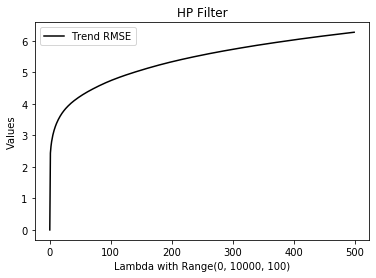

In [13]:
plt.plot(trend_data, color = 'black', label = f'Trend RMSE')
plt.title(f'HP Filter')
plt.xlabel('Lambda with Range(0, 10000, 100)')
plt.ylabel(f'Values')
plt.legend()
plt.show()

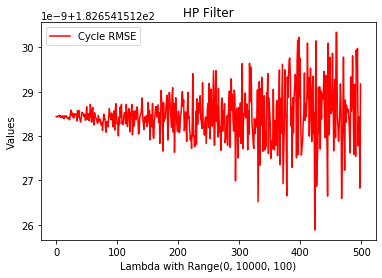

In [14]:
plt.plot(cycle_data, color = 'red', label = f'Cycle RMSE')
plt.title(f'HP Filter')
plt.xlabel('Lambda with Range(0, 10000, 100)')
plt.ylabel(f'Values')
plt.legend()
plt.show()

Investigation ends here.